In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress, t
import statsmodels.formula.api as smf
from patsy.contrasts import Treatment

import sys; sys.path.insert(0, '..')
from utils import LinearRegDiagnostic

In [2]:
path = "~/Desktop/ISLR_Labs/data/Carseats.csv"
data = pd.read_csv(path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
192,7.56,108,26,0,408,93,Medium,56,14,No,No
14,11.17,107,117,11,148,118,Good,52,18,Yes,Yes
296,8.21,127,44,13,160,123,Good,63,18,Yes,Yes
220,10.59,131,120,15,262,124,Medium,30,10,Yes,Yes
226,7.80,119,33,0,245,122,Good,56,14,Yes,No
281,11.19,122,69,7,303,105,Good,45,16,No,Yes
191,6.67,156,42,13,170,173,Good,74,14,Yes,Yes
170,8.01,128,39,12,356,118,Medium,71,10,Yes,Yes
356,3.58,142,109,0,111,164,Good,72,12,Yes,No
307,5.90,138,92,0,13,120,Bad,61,12,Yes,No


a)

In [5]:
results = smf.ols("Sales ~ Price + Urban + US", data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.39e-23
Time:                        19:20:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

b)

- Intercept: the number of sales in average when the others factor are ignored
- Price: an increase of 1 unit in price will decrease the sales in 54 units
- Urban: that variable is not statistically significant
- US: if the store is the US the sales will increase in 1200 units

c)

$$
    Sales = 13.04 + (-0.05)Price + (-0.02)Urban + 1.20US
$$

d)

In [30]:
all_columns = " + ".join(data.columns.difference(["Sales"]))
formula = 'Sales ~ ' + all_columns
results_all = smf.ols(formula, data=data).fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.60e-166
Time:                        20:28:39   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

The null hypothesis can be rejected for **ShelveLocGood**, **ShelveLocMedium**, **Advertising**, **Age**, **CompPrice**, **Income** and **Price**

e)

In [31]:
results = smf.ols("Sales ~ Price + ShelveLoc + Advertising + Age + CompPrice + Income", data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.25e-170
Time:                        20:32:00   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4752    

f)

- The $R^2$ statistic increase from 0.239 to 0.872, F-statistic increase from 41.54 to 381.4
- The statistic shows that the model **e)** fits better the data

g)

The confident intervals are in the previous table

h)

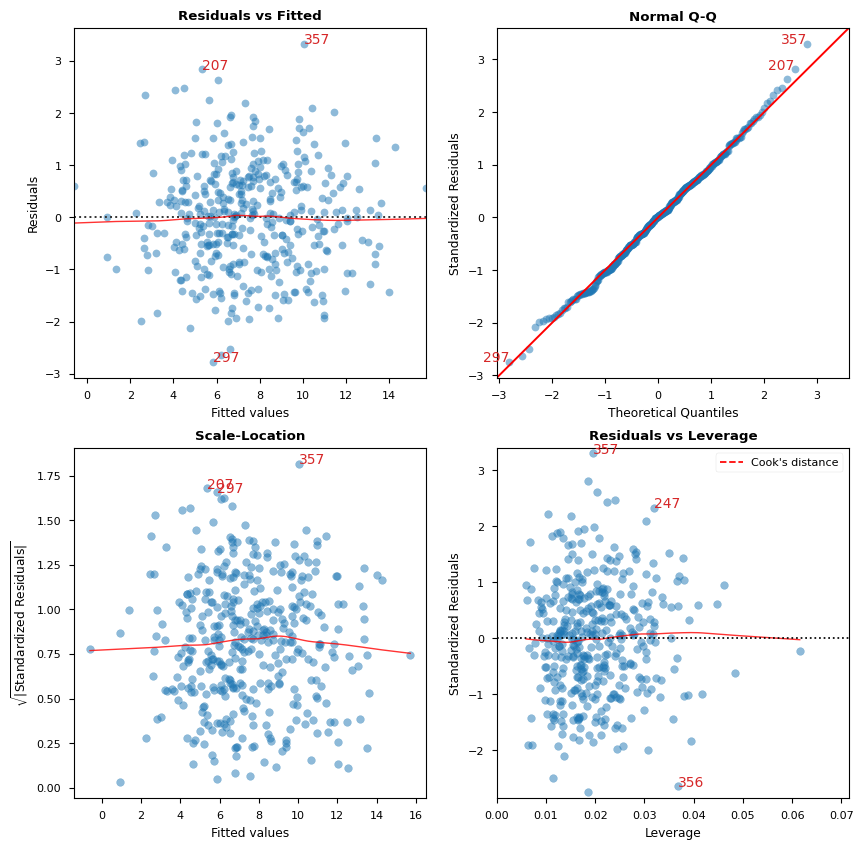

              Features  VIF Factor
4          Advertising        1.01
7               Income        1.02
5                  Age        1.02
1    ShelveLoc[T.Good]        1.50
2  ShelveLoc[T.Medium]        1.50
3                Price        1.53
6            CompPrice        1.53
0            Intercept       98.16


In [32]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

- The previous charts indicates there are some outliers
- The Residuals vs Leverage plot indicates there is a high leverage observation